Linear model: $y_i = \beta_0 + \beta_1 \cdot x_{i1} + \beta_2 \cdot x_{i2} + \varepsilon_i$

- "We’d like for our predicted outputs to be 0 or 1, to indicate class membership. It’s fine if they’re between 0 and 1, since we can interpret these as probabilities — an output of 0.25 could mean 25% chance of being a paid member. But the outputs of the linear model can be huge positive numbers or even negative numbers, which it’s not clear how to interpret. Indeed, here a lot of our predictions were negative."
- "The linear regression model assumed that the errors were uncorrelated with the columns of x. \[...\] But we know that the actual values must be at most 1, which means that necessarily very large outputs \[...\] correspond to very large negative values of the error term. Because this is the case, our estimate of beta is biased."

"*What we’d like instead is for large positive values of dot(x_i, beta) to correspond to probabilities close to 1, and for large negative values to correspond to probabilities close to 0. We can accomplish this by applying another function to the result.*"

#### The Logistic Function

In [2]:
import math

def logistic(x):
    return 1.0 / (1 + math.exp(-x))

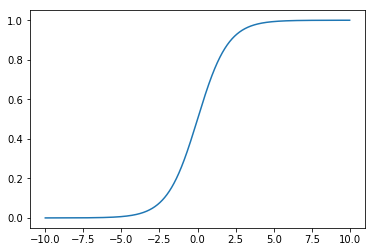

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

xs = [i/100. for i in range(-1000,1000)]
ys = [logistic(x) for x in xs]

plt.plot(xs,ys)

"As its input gets large and positive, it gets closer and closer to 1. As its input gets large and negative, it gets closer and closer to 0. Additionally, it has the convenient property that its derivative is given by:"

In [4]:
def logistic_prime(x):
    return logistic(x) * (1 - logistic(x))

We'll use thisto fit the model:

$y_i = f\big(x_i \cdot \beta \big) + \varepsilon_i$

where $f(\cdot)$ is the logistic function.

"Recall that for linear regression we fit the model by minimizing the sum of squared errors, which ended up choosing the β that maximized the likelihood of the data.

Here the two aren’t equivalent, so we’ll use gradient descent to maximize the likelihood directly. This means we need to calculate the likelihood function and its gradient."

"Given some $\beta$, our model says that each $y_i$ should equal $1$ with probability $f\big(x_i\ \beta\big)$ and $0$ with probability $1 - f\big(x_i\ \beta\big)$.

In particular, the p.d.f. for $y_i$ can be written as:

$p\big(y_i | x_i\ , \beta \big) = f\big(x_i\ \beta\big)^{y_i}\ \big[1 - f\big(x_i\ \beta\big)\big]^{1-y_i}$

since if $y_i$ is $0$, this equals:

$1 - f\big(x_i\ \beta\big)$

and if $y_i$ is 1, this equals:

$f\big(x_i\ \beta\big)$. "

"It turns out that it’s actually simpler to maximize the *log likelihood*:"

$\log L (\beta | x_i, y_i) = y_i\ \log f\big(x_i\ \beta \big) + (1-y_i)\ \log \big[1 - f\big(x_i\ \beta \big)\big]$ .

"Because log is strictly increasing function, any beta that maximizes the log likelihood also maximizes the likelihood, and vice versa."

In [5]:
def dot(v, w):
    """
    v_1 * w_1 + ... + v_n * w_n
    """
    return sum(v_i * w_i 
               for v_i, w_i in zip(v, w))

def logistic_log_likelihood_i(x_i, y_i, beta):
    if y_i == 1:
        return math.log(logistic(dot(x_i, beta)))
    else:
        return math.log(1 - logistic(dot(x_i, beta)))

"If we assume different data points are independent from one another, the overall likelihood is just the product of the individual likelihoods. Which means the overall log likelihood is the sum of the individual log likelihoods:"

In [6]:
def logistic_log_likelihood(x, y, beta):
    return sum(logistic_log_likelihood_i(x_i, y_i, beta)
               for x_i, y_i in zip(x, y))

In [7]:
def logistic_log_partial_ij(x_i, y_i, beta, j):
    """
    here i is the index of the data point,
    j the index of the derivative
    """
    return (y_i - logistic(dot(x_i, beta))) * x_i[j]

def logistic_log_gradient_i(x_i, y_i, beta):
    """
    the gradient of the log likelihood
    corresponding to the ith data point
    """
    return [logistic_log_partial_ij(x_i, y_i, beta, j)
            for j, _ in enumerate(beta)]

def logistic_log_gradient(x, y, beta):
    return reduce(vector_add,
                  [logistic_log_gradient_i(x_i, y_i, beta)
                   for x_i, y_i in zip(x,y)])

#### Goodness of fit

~~~
true_positives = false_positives = true_negatives = false_negatives = 0
for x_i, y_i in zip(x_test, y_test):
    predict = logistic(dot(beta_hat, x_i))
    if y_i == 1 and predict >= 0.5:
        true_positives += 1
    elif y_i == 1:
        false_negatives += 1
    elif predict >= 0.5:
        false_positives += 1
    else:
        true_negatives += 1

precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
~~~

#### Support Vector Machines

"The set of points where *dot(beta_hat, x_i)* equals 0 is the boundary between our classes."

- "This boundary is a hyperplane that splits the parameter space into two half-spaces \[...\]. We found it as a side-effect of finding the most likely logistic model."

"**An alternative approach to classification is to just look for the hyperplane that 'best' separates the classes in the training data. This is the idea behind the support vector machine, which finds the hyperplane that maximizes the distance to the nearest point in each class**".

- "Finding such a hyperplane is an optimization problem that involves techniques that are too advanced for us."
- "A different problem is that a separating hyperplane might not exist at all."
    - "We can (sometimes) get around this by transforming the data into a higher-dimensional space."